<a href="https://colab.research.google.com/github/navyaanand-5/Weather-Classification-Project/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/ML/Project/weather_forecast_data.csv')

In [ ]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [ ]:
df.tail()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain
2499,26.554356,97.101517,18.563084,81.357508,1001.729176,no rain


In [ ]:
df.shape

(2500, 6)

In [ ]:
df.size

15000

In [ ]:
df.ndim

2

In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [ ]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [ ]:
df['Rain'].unique()

array(['rain', 'no rain'], dtype=object)

In [ ]:
df['Rain'].value_counts()

,count
Rain,
no rain,2186
rain,314


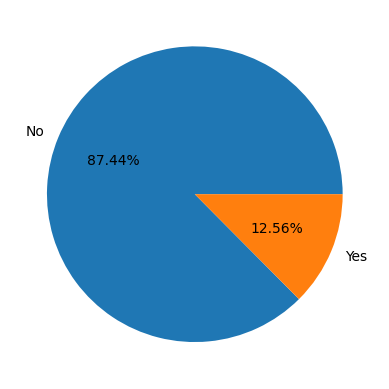

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['Rain'].value_counts(),labels=['No','Yes'],autopct='%.2f%%')
plt.show()

In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Rain'] = le.fit_transform(df['Rain'])
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


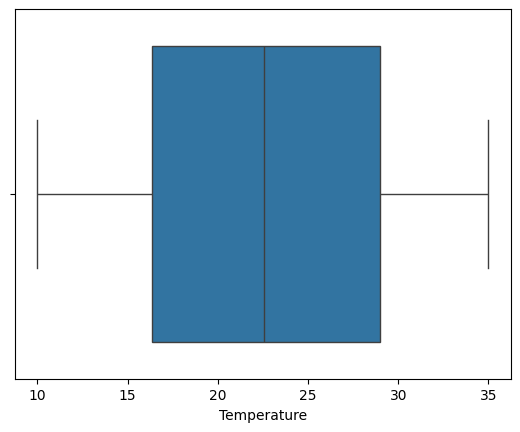

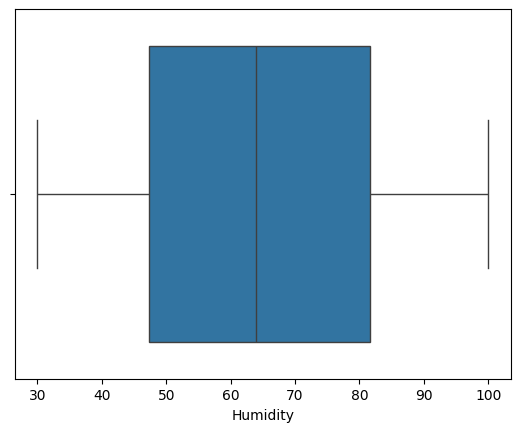

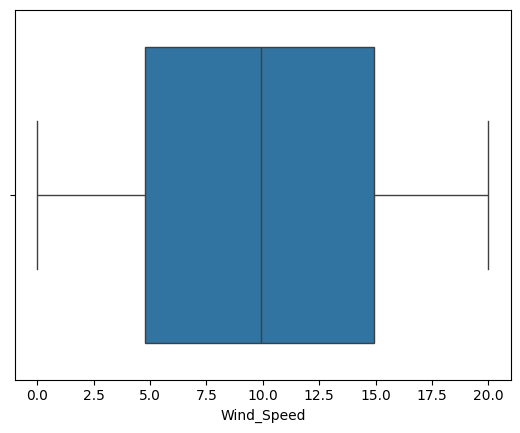

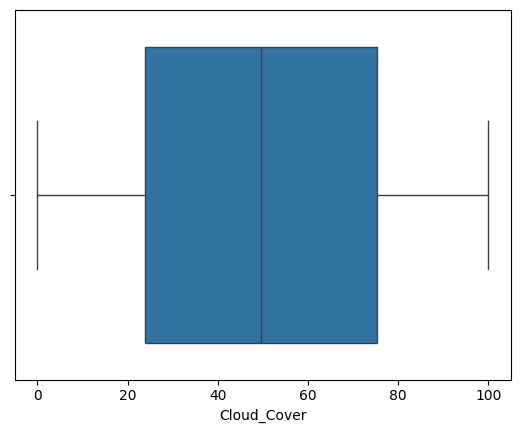

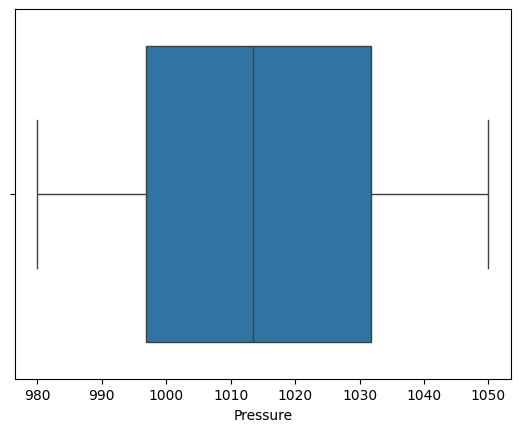

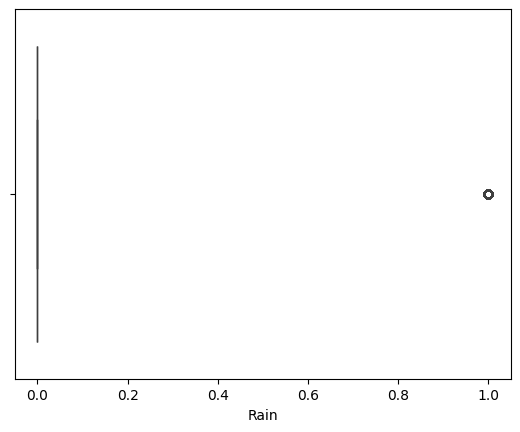

In [ ]:
for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()

In [ ]:
df.corr()['Rain']

,Rain
Temperature,-0.265882
Humidity,0.382464
Wind_Speed,-0.001389
Cloud_Cover,0.326216
Pressure,0.008273
Rain,1.000000


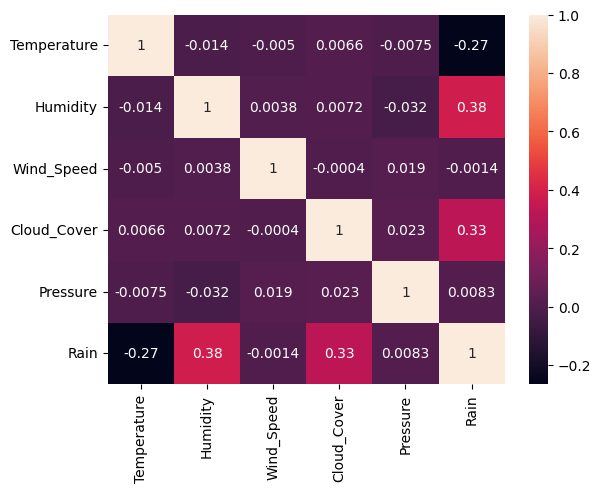

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
x = df.drop('Rain', axis=1)
y = df['Rain']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
Rain,
0,1743
1,257


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train,y_train = sm.fit_resample(x_train,y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

RANDOM FOREST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [ ]:
params = {'n_estimators':[10,15,20,25,30,35,40,45,50] , 'max_depth': [3,4,5,6,7,8,9,10],'min_samples_split': randint(2,11),'bootstrap': [True, False],'criterion': ['gini', 'entropy', 'log_loss']}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
randomCV = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='accuracy')
randomCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79d894328550>,
                                        'n_estimators': [10, 15, 20, 25, 30, 35,
                                                         40, 45, 50]},
                   scoring='accuracy')

In [ ]:
print(randomCV.best_params_)
print(randomCV.score(x_test,y_test))

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 35}
0.998


In [ ]:
rfc1 = RandomForestClassifier(n_estimators=35,bootstrap=False, criterion='entropy', max_depth=7, min_samples_split=8)
rfc1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       min_samples_split=8, n_estimators=35)

In [ ]:
y_pred = rfc1.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
training_score = rfc1.score(x_train,y_train)
testing_score = rfc1.score(x_test,y_test)
print(training_score,testing_score)

1.0 1.0


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
1.0
1.0
[[443   0]
 [  0  57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = rfc1.estimators_[0]

plt.figure(figsize=(200, 50))
plot_tree(estimator, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [ ]:
params = {'splitter':["best", "random"] ,'criterion':["gini", "entropy", "log_loss"],'max_depth':[3,4,5,6,7,8,9,10]}

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
randomCV = RandomizedSearchCV(dtc, param_distributions=params, cv=5, scoring='accuracy')
randomCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [ ]:
print(randomCV.best_params_)
print(randomCV.score(x_test,y_test))

{'splitter': 'best', 'max_depth': 5, 'criterion': 'log_loss'}
1.0


In [ ]:
dtc1 = DecisionTreeClassifier(splitter='best',criterion='log_loss', max_depth=4)
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4)

In [ ]:
y_pred = dtc1.predict(x_test)

In [ ]:
training_score = dtc1.score(x_train,y_train)
testing_score = dtc1.score(x_test,y_test)
print(training_score,testing_score)

1.0 1.0


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
1.0
1.0
[[443   0]
 [  0  57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint

In [ ]:
params = {'dual': [True, False],'max_iter': [10,15,20,25,30,35,40,45,50]}

In [ ]:
lr = LogisticRegression()

In [ ]:
randomCV = RandomizedSearchCV(lr, param_distributions = params, cv=5, scoring='accuracy')
randomCV.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'max_iter': [10, 15, 20, 25, 30, 35, 40,
                                                     45, 50]},
                   scoring='accuracy')

In [ ]:
print(randomCV.best_params_)
print(randomCV.score(x_test,y_test))

{'max_iter': 45, 'dual': False}
0.898


In [ ]:
lr1 = LogisticRegression(dual=False, max_iter=45)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=45)

In [ ]:
y_pred = lr1.predict(x_test)

In [ ]:
training_score = lr1.score(x_train,y_train)
testng_score = lr1.score(x_test,y_test)
print(training_score,testng_score)

0.919104991394148 0.898


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.898
0.53125
0.6666666666666666
[[398  45]
 [  6  51]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       443
           1       0.53      0.89      0.67        57

    accuracy                           0.90       500
   macro avg       0.76      0.90      0.80       500
weighted avg       0.93      0.90      0.91       500



KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

In [ ]:
param_dist = {'n_neighbors': list(range(1, 31)),'weights': ['uniform', 'distance'],'p': [1, 2]}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
randomCV = RandomizedSearchCV(knn, param_distributions = param_dist, cv=5, scoring='accuracy')
randomCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
print(randomCV.best_params_)
print(randomCV.score(x_test,y_test))

{'weights': 'uniform', 'p': 2, 'n_neighbors': 2}
0.96


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform')
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [ ]:
y_pred = knn1.predict(x_test)

In [ ]:
training_score = knn1.score(x_train,y_train)
testng_score = knn1.score(x_test,y_test)
print(training_score,testng_score)

0.9997131382673551 0.964


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.964
0.819672131147541
0.847457627118644
[[432  11]
 [  7  50]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       443
           1       0.82      0.88      0.85        57

    accuracy                           0.96       500
   macro avg       0.90      0.93      0.91       500
weighted avg       0.97      0.96      0.96       500



NAIVE BAYES

Gaussian

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint

In [ ]:
param_dist = {'var_smoothing': np.logspace(-12, -6, 100)}

In [ ]:
gnb = GaussianNB()

In [ ]:
randomCV = RandomizedSearchCV(gnb, param_distributions = param_dist, cv=5, scoring='accuracy')
randomCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e-12, 1.14975700e-12, 1.32194115e-12, 1.51991108e-12,
       1.74752840e-12, 2.00923300e-12, 2.31012970e-12, 2.65608778e-12,
       3.05385551e-12, 3.51119173e-12, 4.03701726e-12, 4.64158883e-12,
       5.33669923e-12, 6.13590727e-12, 7.05480231e-12, 8.11130831e-12,
       9.32603347e-12, 1.07...
       4.03701726e-08, 4.64158883e-08, 5.33669923e-08, 6.13590727e-08,
       7.05480231e-08, 8.11130831e-08, 9.32603347e-08, 1.07226722e-07,
       1.23284674e-07, 1.41747416e-07, 1.62975083e-07, 1.87381742e-07,
       2.15443469e-07, 2.47707636e-07, 2.84803587e-07, 3.27454916e-07,
       3.76493581e-07, 4.32876128e-07, 4.97702356e-07, 5.72236766e-07,
       6.57933225e-07, 7.56463328e-07, 8.69749003e-07, 1.00000000e-06])},
                   scoring='accuracy')

In [ ]:
print(randomCV.best_params_)
print(randomCV.score(x_test,y_test))

{'var_smoothing': np.float64(4.641588833612782e-08)}
0.944


In [ ]:
gnb1 = GaussianNB(var_smoothing=4.641588833612782e-08)
gnb1.fit(x_train,y_train)

GaussianNB(var_smoothing=4.641588833612782e-08)

In [ ]:
y_pred = gnb1.predict(x_test)

In [ ]:
training_score = gnb1.score(x_train,y_train)
testng_score = gnb1.score(x_test,y_test)
print(training_score,testng_score)

0.9713138267355135 0.944


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.944
0.6883116883116883
0.7910447761194029
[[419  24]
 [  4  53]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       443
           1       0.69      0.93      0.79        57

    accuracy                           0.94       500
   macro avg       0.84      0.94      0.88       500
weighted avg       0.96      0.94      0.95       500



Bernoulli

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import randint

In [ ]:
param_dist = {'alpha': np.logspace(-3, 1, 100),'fit_prior': [True, False],}

In [ ]:
bnb = BernoulliNB()

In [ ]:
randomCV = RandomizedSearchCV(bnb, param_distributions = param_dist, cv=5, scoring='accuracy')
randomCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=BernoulliNB(),
                   param_distributions={'alpha': array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03, 1.32194115e-03,
       1.45082878e-03, 1.59228279e-03, 1.74752840e-03, 1.91791026e-03,
       2.10490414e-03, 2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03, 4.03701726e-03,
       4.43062146e-03, 4.86260158e...
       1.17681195e+00, 1.29154967e+00, 1.41747416e+00, 1.55567614e+00,
       1.70735265e+00, 1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00, 3.27454916e+00,
       3.59381366e+00, 3.94420606e+00, 4.32876128e+00, 4.75081016e+00,
       5.21400829e+00, 5.72236766e+00, 6.28029144e+00, 6.89261210e+00,
       7.56463328e+00, 8.30217568e+00, 9.11162756e+00, 1.00000000e+01]),
                                        'fit_prior': [True, False]},
                   scoring='accuracy')

In [ ]:
print(randomCV.best_params_)
print(randomCV.score(x_test,y_test))

{'fit_prior': True, 'alpha': np.float64(0.24201282647943834)}
0.846


In [ ]:
bnb1 = BernoulliNB(fit_prior=True, alpha=0.24201282647943834)
bnb1.fit(x_train,y_train)

BernoulliNB(alpha=0.24201282647943834)

In [ ]:
y_pred = bnb1.predict(x_test)

In [ ]:
training_score = bnb1.score(x_train,y_train)
testng_score = bnb1.score(x_test,y_test)
print(training_score,testng_score)

0.8709122203098106 0.846


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.846
0.41379310344827586
0.5549132947976878
[[375  68]
 [  9  48]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       443
           1       0.41      0.84      0.55        57

    accuracy                           0.85       500
   macro avg       0.70      0.84      0.73       500
weighted avg       0.91      0.85      0.87       500



.

.

In [ ]:
import pandas as pd


eva = {
    'Model': [ 'Random Forest','DecisionTree','Logistic Regression','KNN','GaussianNaiveBayes','BernoulliNaiveBayes','SVM','Adaboost'],
    'Accuracy': [1.0,1.0,0.898,0.964,0.944,0.846,0.96,0.996],
    'Precision': [1.0,1.0,0.531,0.819,0.688,0.413,0.768,0.982],
    'F1-Score': [1.0,1.0,0.666,0.847,0.791,0.554,0.841,0.982]
}

comp = pd.DataFrame(eva)


print(comp)

                 Model  Accuracy  Precision  F1-Score
0        Random Forest     1.000      1.000     1.000
1         DecisionTree     1.000      1.000     1.000
2  Logistic Regression     0.898      0.531     0.666
3                  KNN     0.964      0.819     0.847
4   GaussianNaiveBayes     0.944      0.688     0.791
5  BernoulliNaiveBayes     0.846      0.413     0.554
6                  SVM     0.960      0.768     0.841
7             Adaboost     0.996      0.982     0.982


Streamlit

In [ ]:
import pickle

pickle.dump(rfc1,open('rnd.sav','wb'))

In [ ]:
import pickle

pickle.dump(sc,open('scal.sav','wb'))

In [ ]:
pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.5.2
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.23
albumentations                        2.0.5
ale-py                                0.10.2
altair                                5.5.0
annotated-types                       0.7.0
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.1
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.4.14.0.37.22
astunparse                            1.6.3
atpublic                              5